In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Lesson 1.2: Discrete Time Signals

Discrete time signals are values recorded at specific moments in time. Think e.g. daily measurements of the water level of your local river.

Formally though they are defined as a (for now) one-dimensional sequence noted as 

\begin{align}
x[n]
\end{align}

where $n\in\mathbb{Z}$ and $x[n]\in\mathbb{C}$, the complex numbers.

A common visualisation to emphasise the discrete nature of the values is a **Lollipop Diagram**.



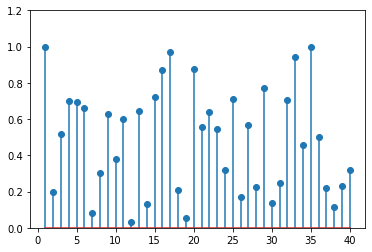

In [5]:
x = range(1,41)
values = np.random.uniform(size=40)
 
# stem function: first way
plt.stem(x, values, use_line_collection=True)
plt.ylim(0, 1.2)
plt.show()

An important remark: the time dimension signified by $n$ is **a-dimensional**. It does not have a dimension, but is just the order of samples.

# Important Prototypical Time Series

## Delta

A simple series where everything is zero with the exception of a one at point zero.

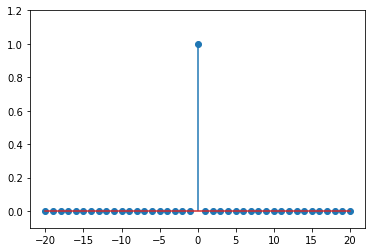

In [8]:
x = range(-20, 20 + 1)
values = np.zeros((41, ))
values[20] = 1.0
 
# stem function: first way
plt.stem(x, values, use_line_collection=True)
plt.ylim(-0.1, 1.2)
plt.show()

## Unit step

From -infinity until step -1 all values are zero, from step 0 to infinity all values are 1.

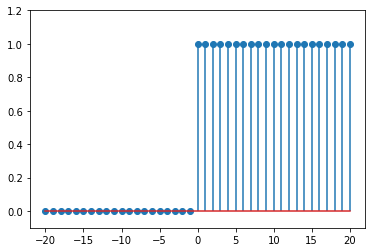

In [9]:
x = range(-20, 20 + 1)
values = np.zeros((41, ))
values[20:] = 1.0
 
plt.stem(x, values, use_line_collection=True)
plt.ylim(-0.1, 1.2)
plt.show()

## Exponential Decay

All zeros until -1, then take an $a, a\in[0..1)$ where $x[0] = a^0, x[1] = a^1, x[i] = a^i$.

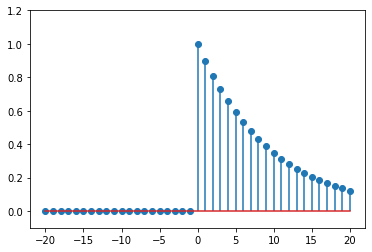

In [11]:
x = range(-20, 20 + 1)
values = np.zeros((41, ))
values[20:] = 0.9
for i in range(21):
    values[20 + i] = values[20 + i] ** i
 
plt.stem(x, values, use_line_collection=True)
plt.ylim(-0.1, 1.2)
plt.show()

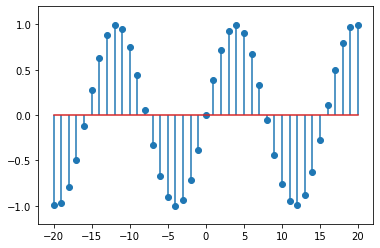

In [17]:
x = range(-20, 20 + 1)
values = np.linspace(-20, 20, num=len(x))

values = np.sin(values * 0.4)
plt.stem(x, values, use_line_collection=True)
plt.ylim(-1.2, 1.2)
plt.show()

# Classes of Signals

We describe four distinguished types of signals:

 - finite signals, where $x[n]$ with $n\in[0..N-1], N\in\mathbb{N}$. Can be thought of like numpy arrays. Sometimes we use vector notation $x = [v_0 v_1 ... v_{N-1}]^T$.
 - infinite signals, where $n\in\mathbb{Z}$. They mostly serve theoretical purposes to develop the tools for DSP.
 - periodic signals, where $\tilde{x}[n] = \tilde{x}[n + kN], n,k,N\in\mathbb{Z}$. Here the data repeats every $N$ samples. They contain the same amount of information as do finite signals, but are infinite in nature, bridging finite and infinite signals.
 - finite support sequences.
 \begin{align}
\bar{x}[n] = 
\begin{cases}
x[n] & if 0\in[0..N]\\
0 & otherwise
\end{cases}
\end{align}

They also contain the same amount of information as and act as bridge.

# Elementary operators on Signals
 - scaling: $y[n] = \alpha x[n], \alpha\in\mathbb{C}$
 - sum: $y[n] = x[n] + z[n]$
 - product: $y[n] = x[n]\cdot z[n]$
 - shift/delay by $k$: $y[n] = x[n + k]$
 
 There is a caveat with the shift - we have to be careful about the index ranges. As $x[n]$ is only defined for $n\in[0..N]$. So if $n+k > N$ we have to make a choice: either we use $\bar{x}$ instead of $x$ so we obtain zeros for those $n+k$. Or we use $\tilde{x}$ instead, basically rotating the sequence $x$ by $k$.

# Energy and Power

The energy of a signal is the sum of it's squared values.

\begin{align}
E_x=\sum_{n=-\infty}^{+\infty}x[n]^2
\end{align}

However for nearly all signals the energy is infinite, because the signals have an infinite number of non-zero samples. So to classify energetic properties we use power instead - energy in a window of values $x[n], n\in[-N..N]$ over the number of steps $2N+1$.

\begin{align}
P_x=\lim_{N\to\infty}\frac{1}{2N+1}\sum_{n=-N}^{N}x[n]^2
\end{align}